# CVD Risk Prediction Model 

In [1]:
import numpy as np
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


## Reading the Dataset 

In [2]:
data = pd.read_csv('dataset.csv')
print(data.shape)
data.head()

(308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### Definition of each feature

- `General_Health` - Would you say that in general your health is?
- `Checkup` - About how long has it been since you last visited a doctor for a routine checkup?
- `Exercise` - During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?
- `Heart_Disease` - Respondents that reported having coronary heart disease or mycardialinfarction
- `Skin_Cancer` - Respondents that reported having skin cancer
- `Other_Cancer` - Respondents that reported having any other types of cancer
- `Depression` - Respondents that reported having a depressive disorder (including depression, major depression, dysthymia, or minor depression)
- `Diabetes` - Respondents that reported having a diabetes. If yes, what type of diabetes it is/was.
- `Arthritis` - Respondents that reported having an Arthritis
- `Sex` - Respondent's Gender

## Performing EDA

In [3]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

### Checking for Unique Values of `object` datatype

In [5]:
def uniqueValues(col):
    return list(data[col].unique())

for col in data.select_dtypes('object').columns:
    print(f'{col}\n{uniqueValues(col)}\n')

General_Health
['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']

Checkup
['Within the past 2 years', 'Within the past year', '5 or more years ago', 'Within the past 5 years', 'Never']

Exercise
['No', 'Yes']

Heart_Disease
['No', 'Yes']

Skin_Cancer
['No', 'Yes']

Other_Cancer
['No', 'Yes']

Depression
['No', 'Yes']

Diabetes
['No', 'Yes', 'No, pre-diabetes or borderline diabetes', 'Yes, but female told only during pregnancy']

Arthritis
['Yes', 'No']

Sex
['Female', 'Male']

Age_Category
['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49', '18-24', '30-34', '55-59', '35-39', '40-44', '25-29']

Smoking_History
['Yes', 'No']



### BMI = Weight(in kg)/Height(in m)**2
- So, let's verify it either bmi is a required variable or not?

In [6]:
bmi_calc = data['Weight_(kg)']/(data['Height_(cm)']*0.01)**2
bmi_calc

0         14.515556
1         28.323232
2         33.290677
3         28.839506
4         24.245498
            ...    
308849    28.929280
308850    21.558642
308851    24.840764
308852    23.703306
308853    31.714844
Length: 308854, dtype: float64

In [7]:
error = (data['BMI'] - bmi_calc)**2
error

0         0.000598
1         0.001104
2         0.032157
3         0.011992
4         0.015501
            ...   
308849    0.014573
308850    0.006185
308851    0.022730
308852    0.000713
308853    0.000023
Length: 308854, dtype: float64

<Axes: >

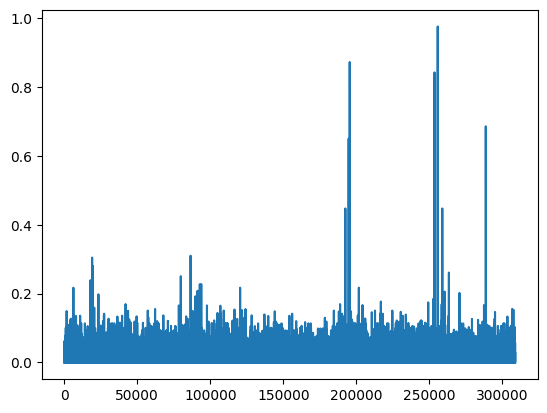

In [8]:
error.plot()

- From here it's verified error is very low for 90%+ dataset. So, we can avoid this feature in further processing.

##### Selecting the target feature

In [9]:
target = 'Heart_Disease'

#### Univariate analysis

In [10]:
def univariate(feature):
    plt.figure(figsize=(12, 8))
    color = 'Set1'
    palette_color = sns.color_palette(color)
    sns.histplot(data[feature], kde=True, bins=30, color=palette_color[random.randint(0, len(palette_color) - 1)])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.savefig(f'univariate_{feature}_distribution.png')
    plt.show()

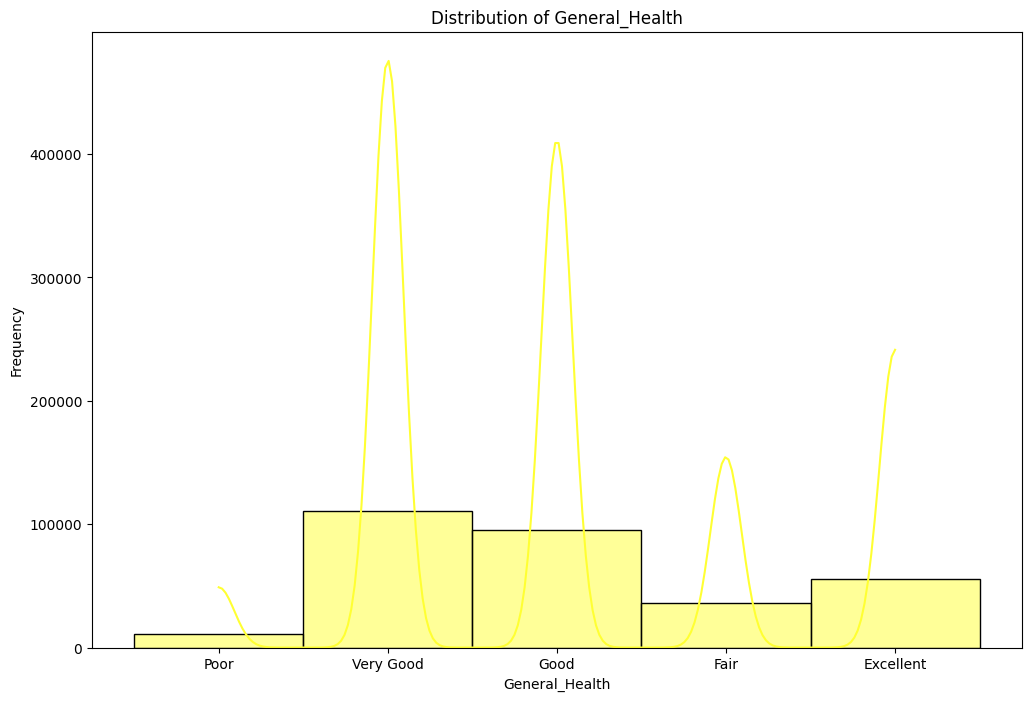

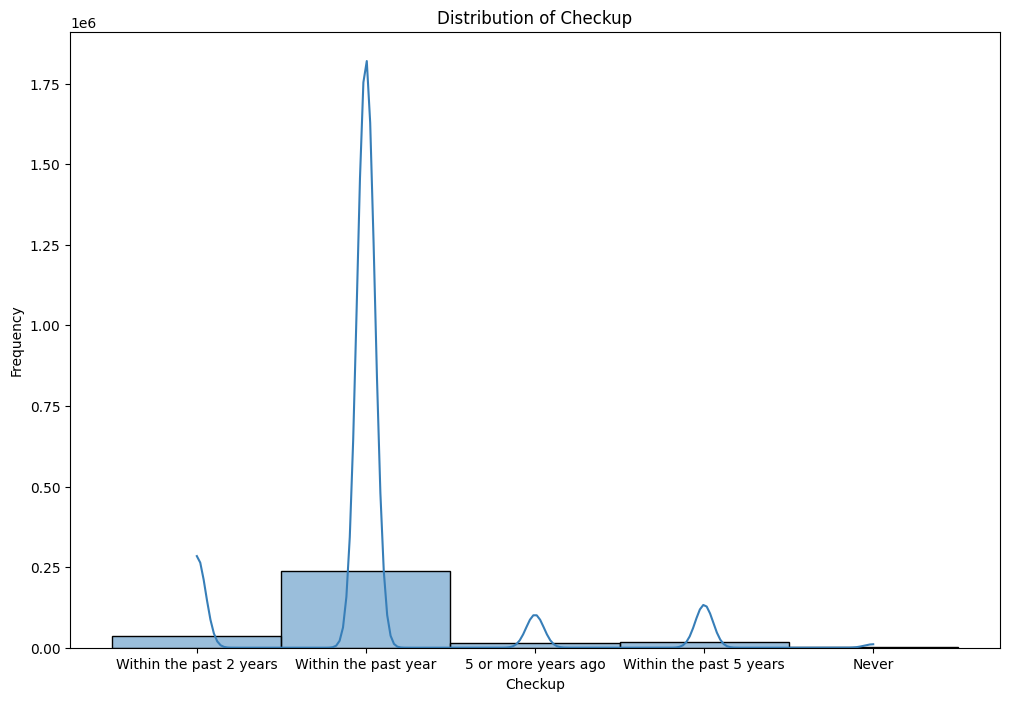

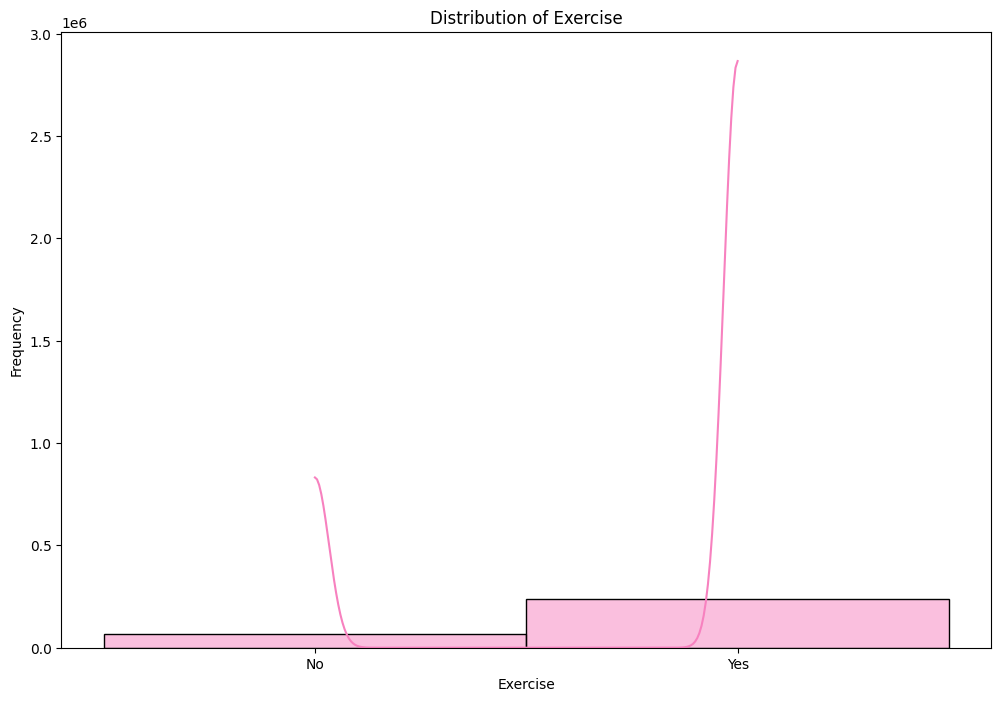

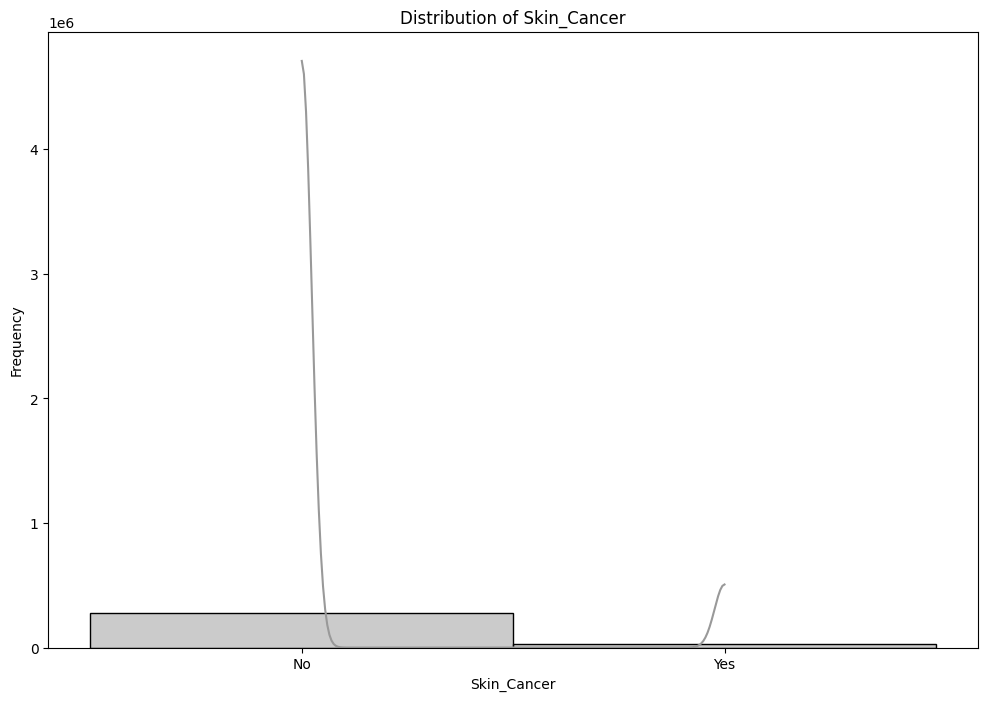

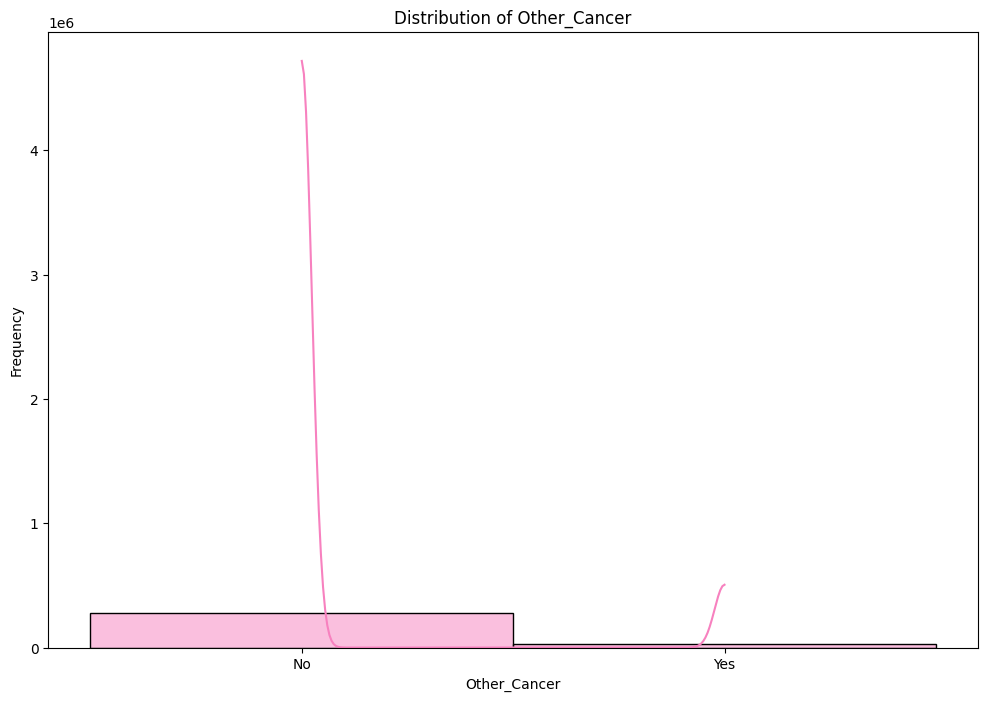

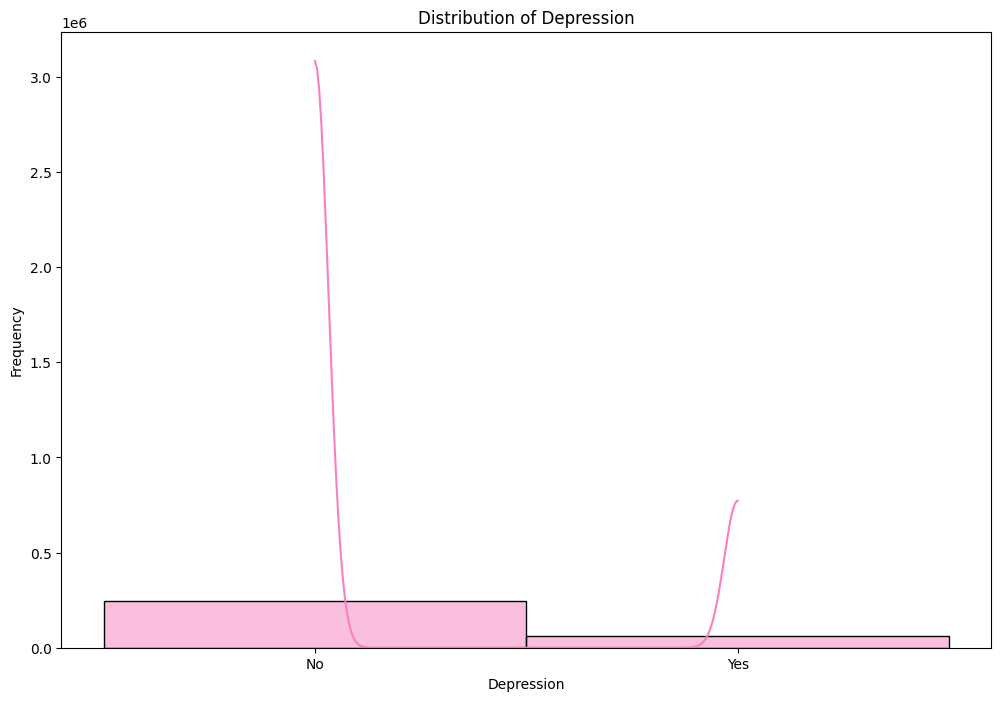

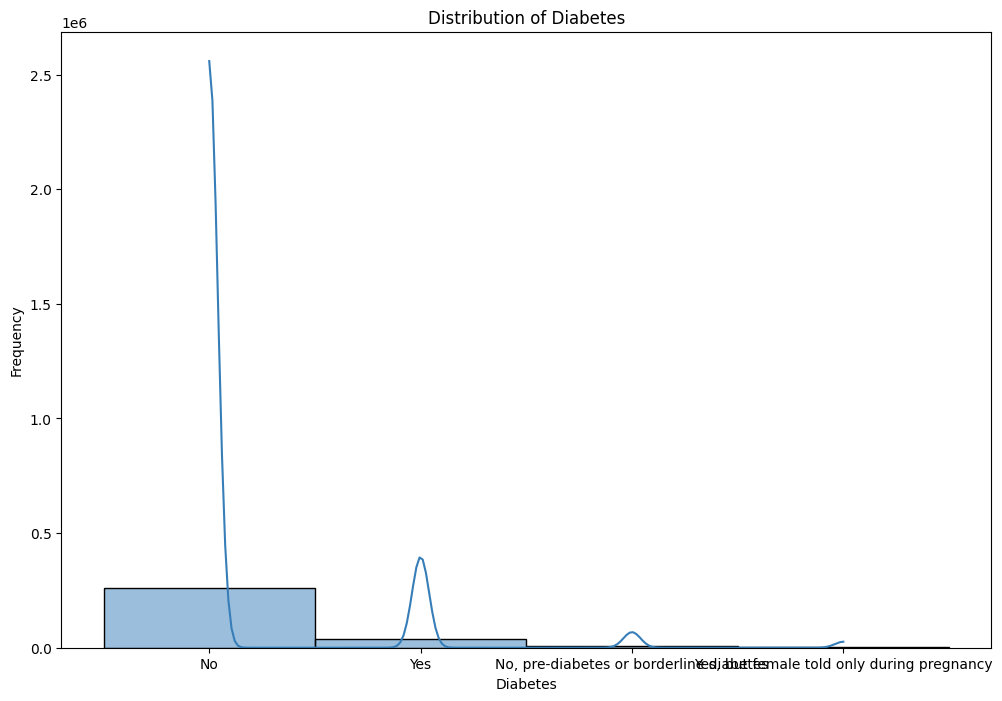

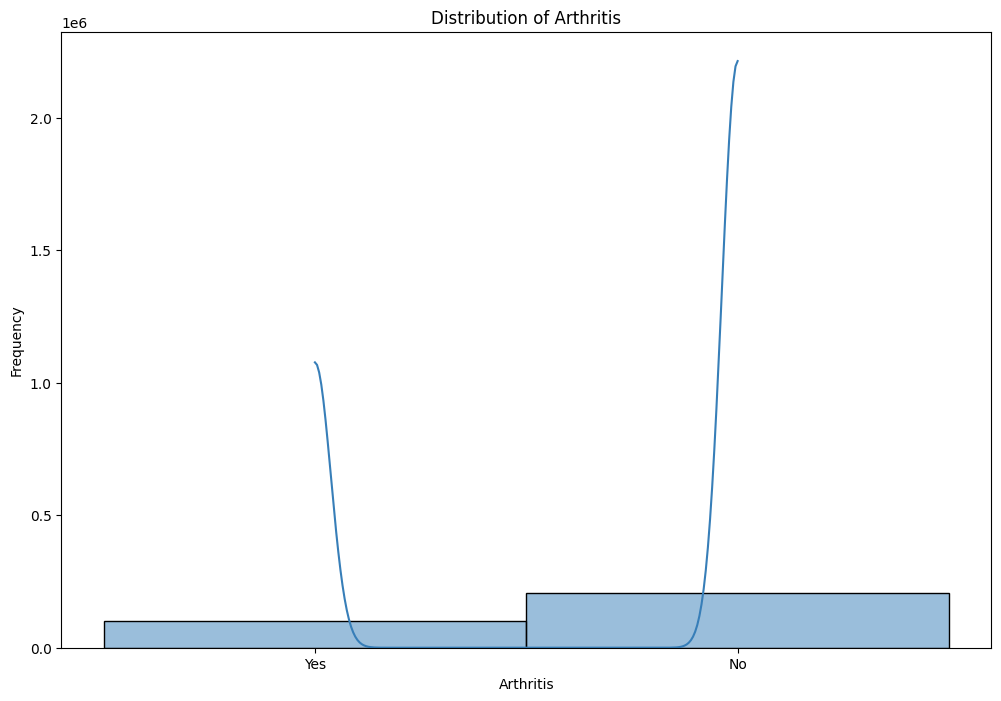

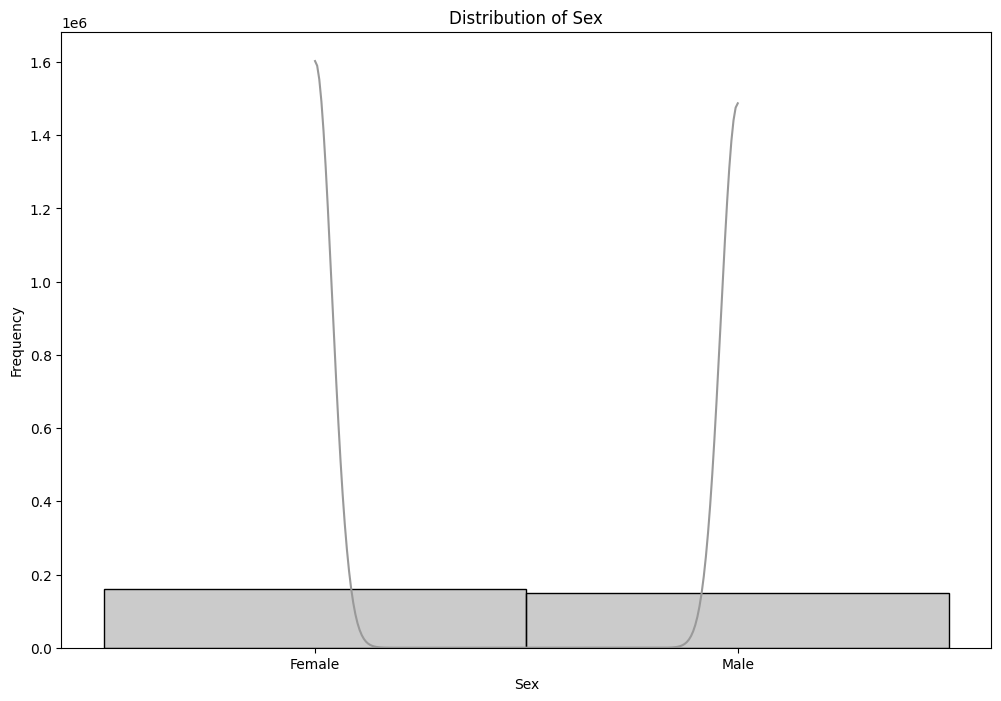

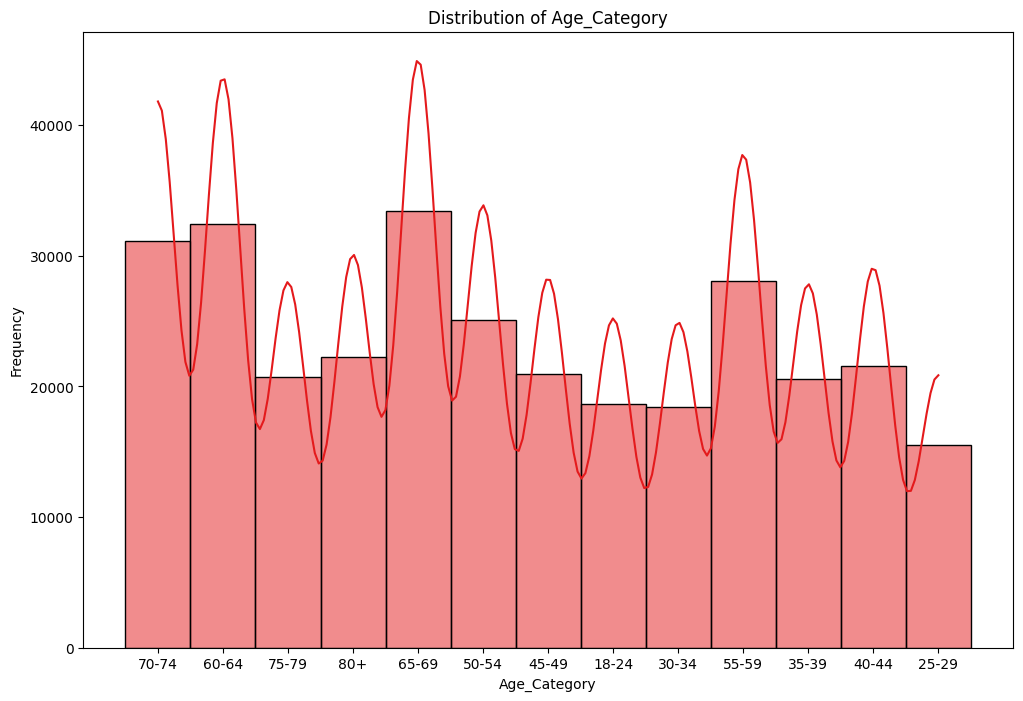

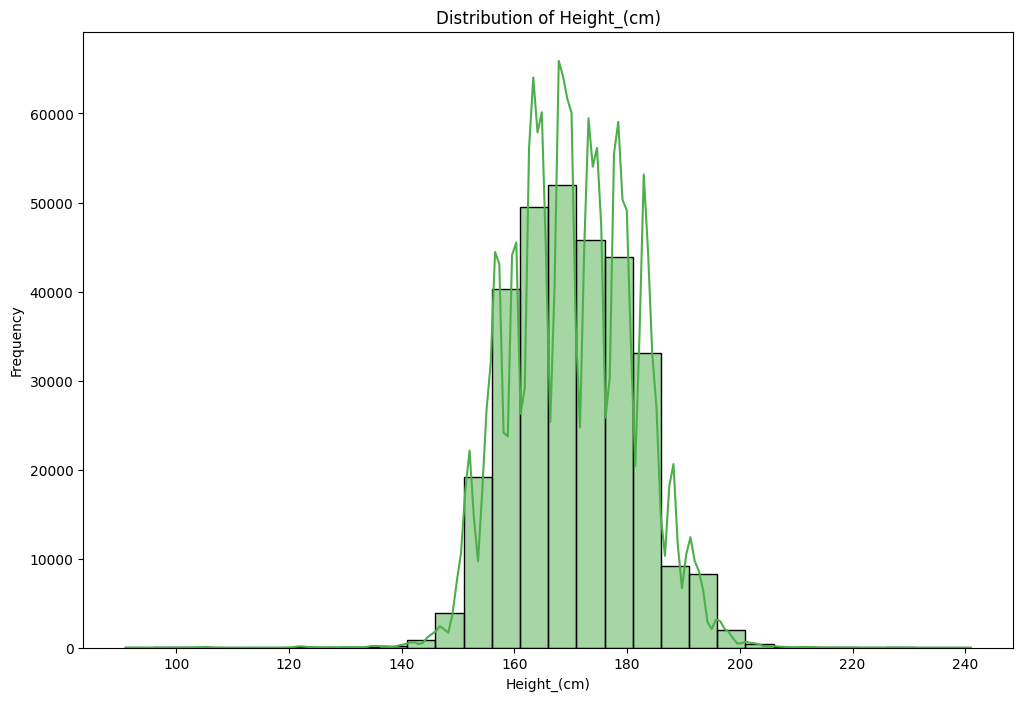

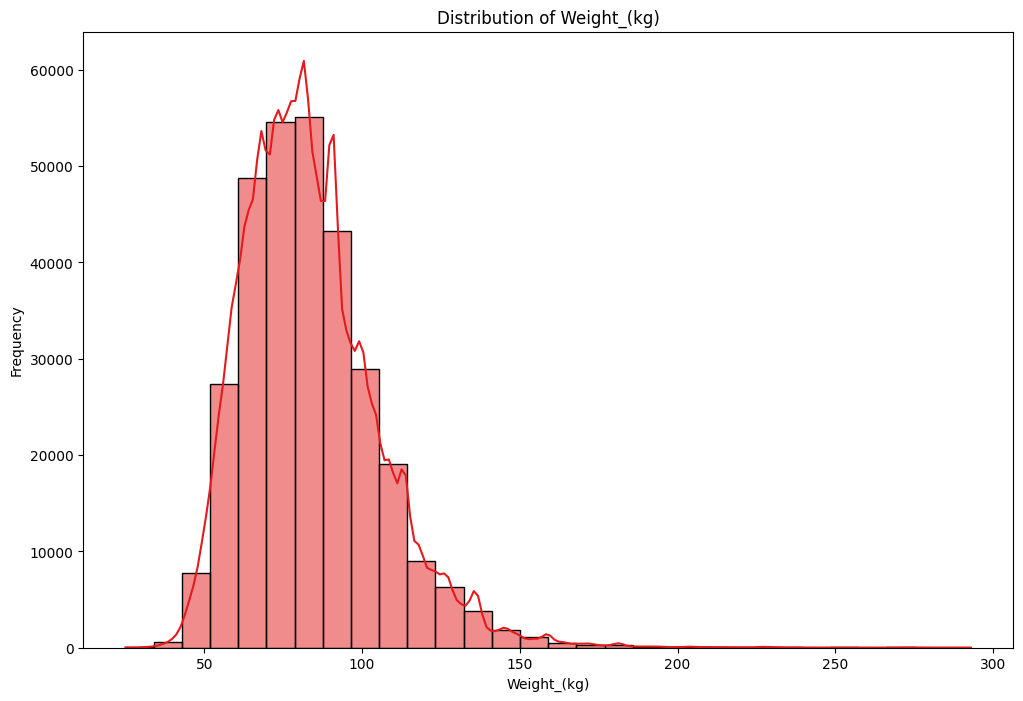

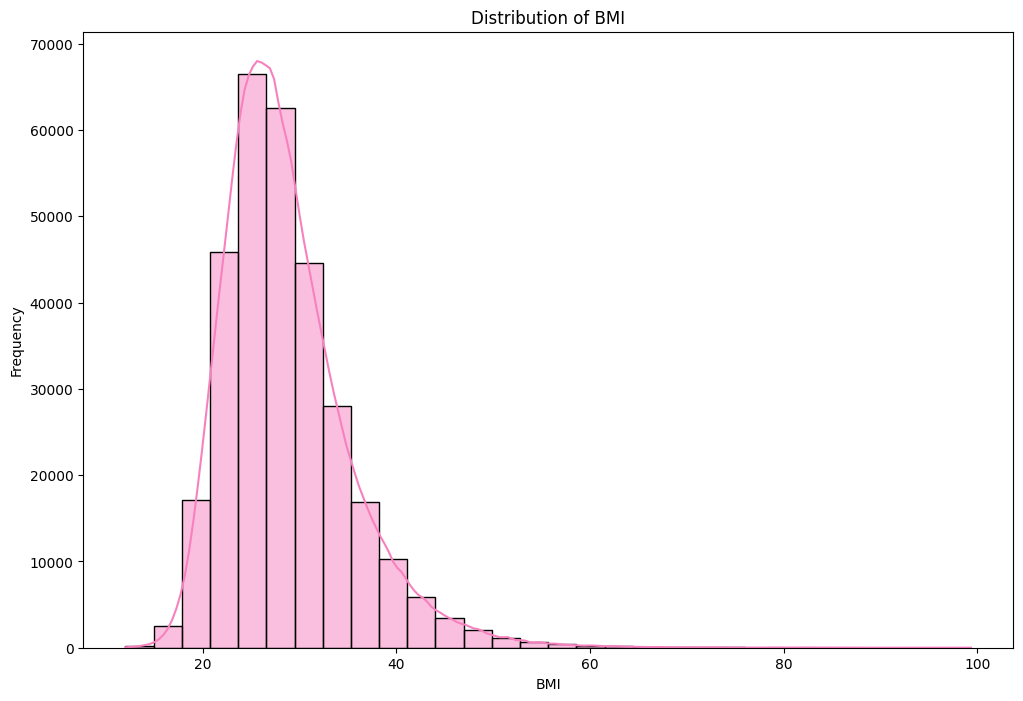

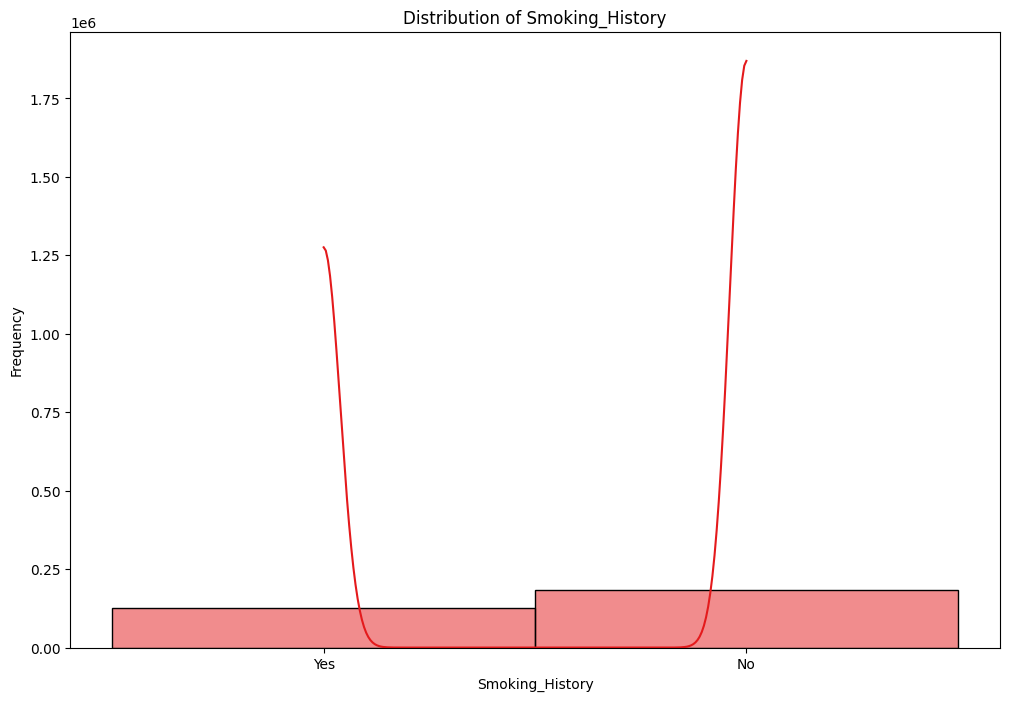

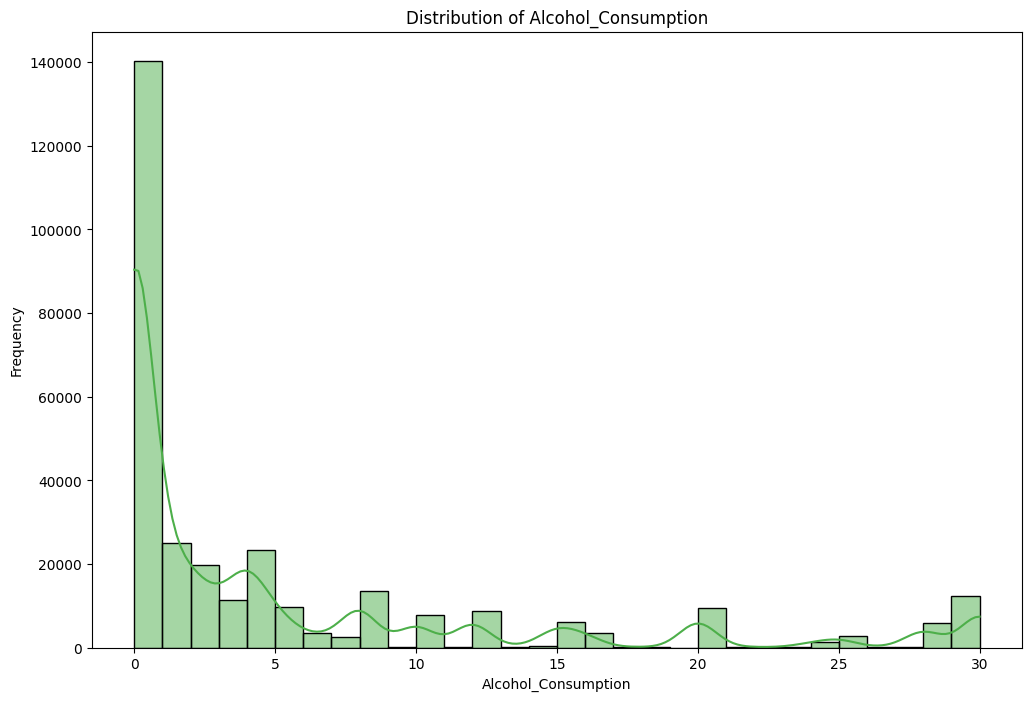

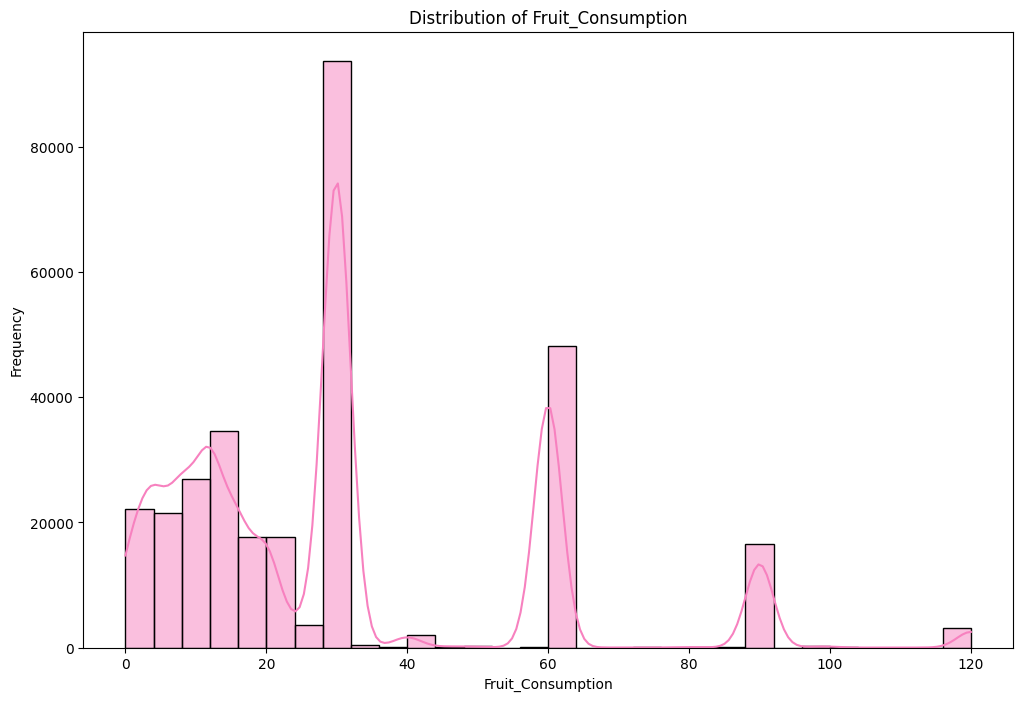

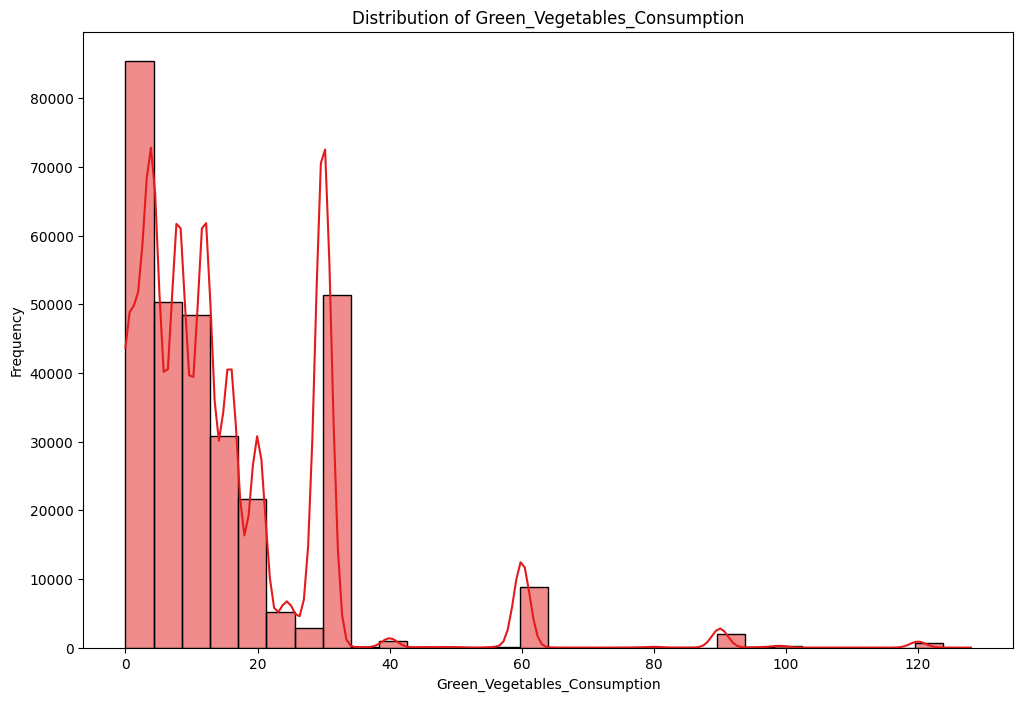

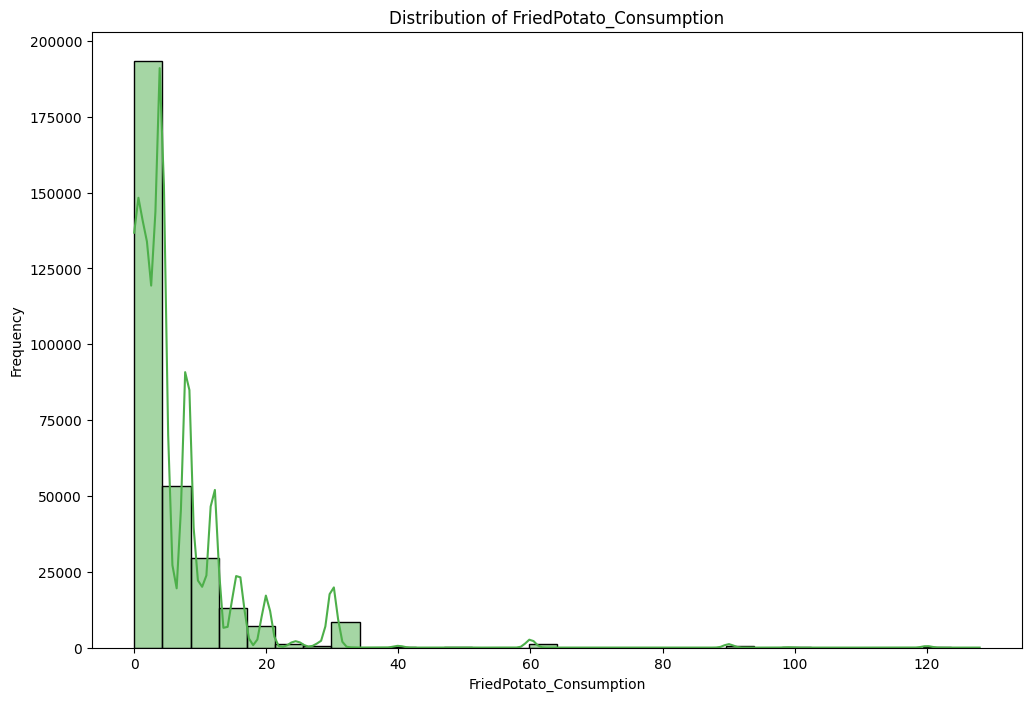

In [11]:
for feature in data.columns:
    if feature != target:
        univariate(feature)

#### Bivariate Analysis

In [12]:
def bivariate(feature):
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=data[feature], y=data[target], hue=data[target], split=True, inner="quart", palette="viridis")
    plt.title(f'Bivariate Histogram of {feature} and {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.savefig(f'bivariate_{feature}_distribution.png')
    plt.show()

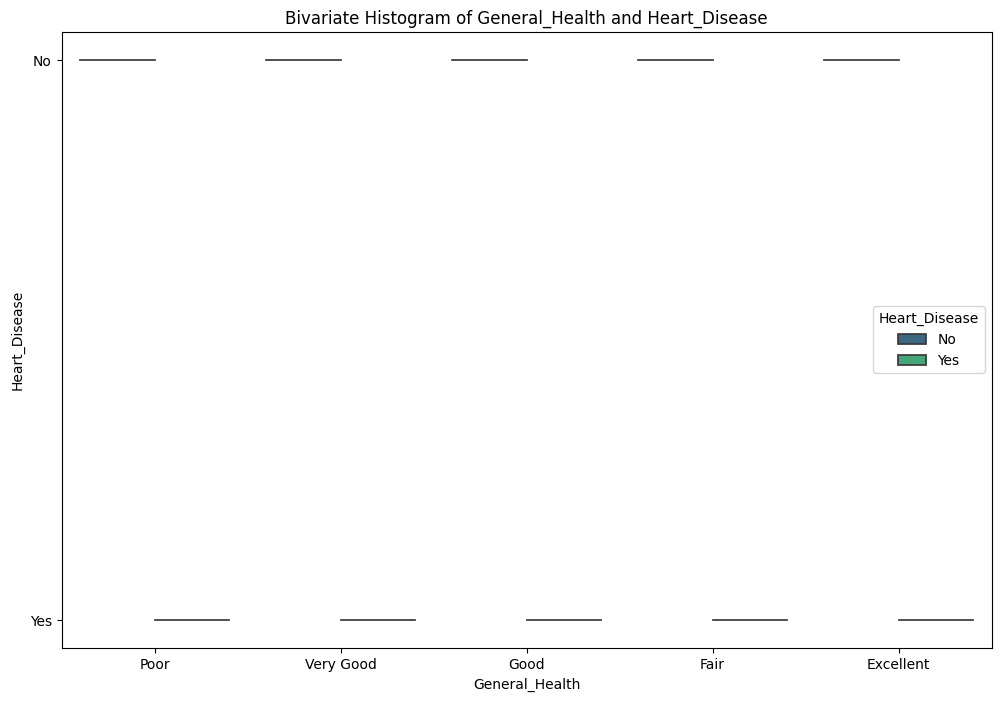

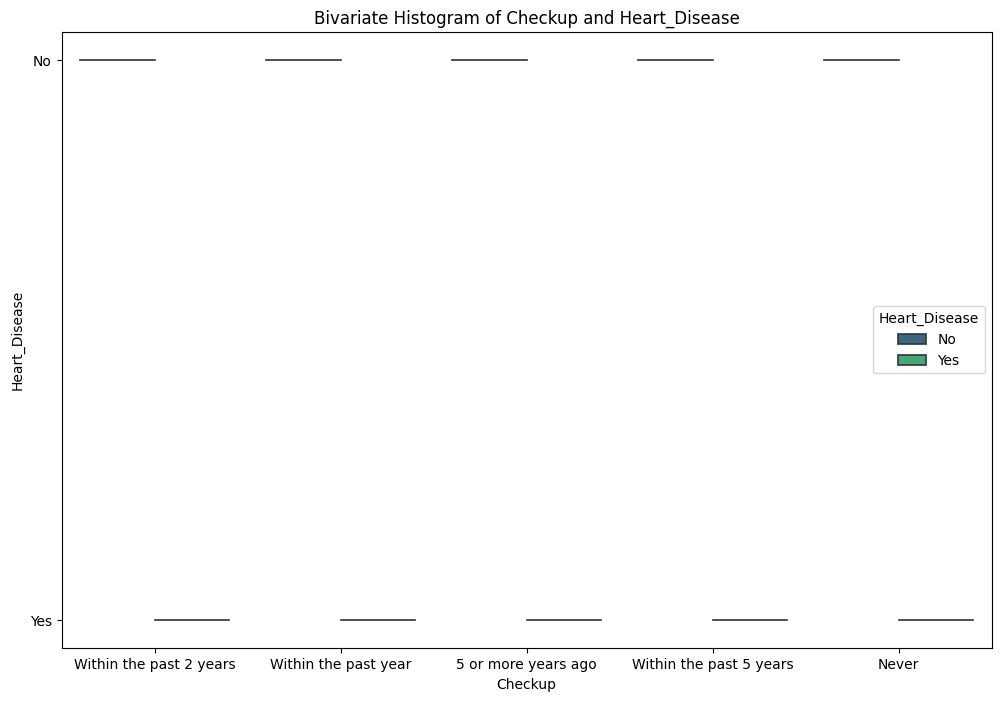

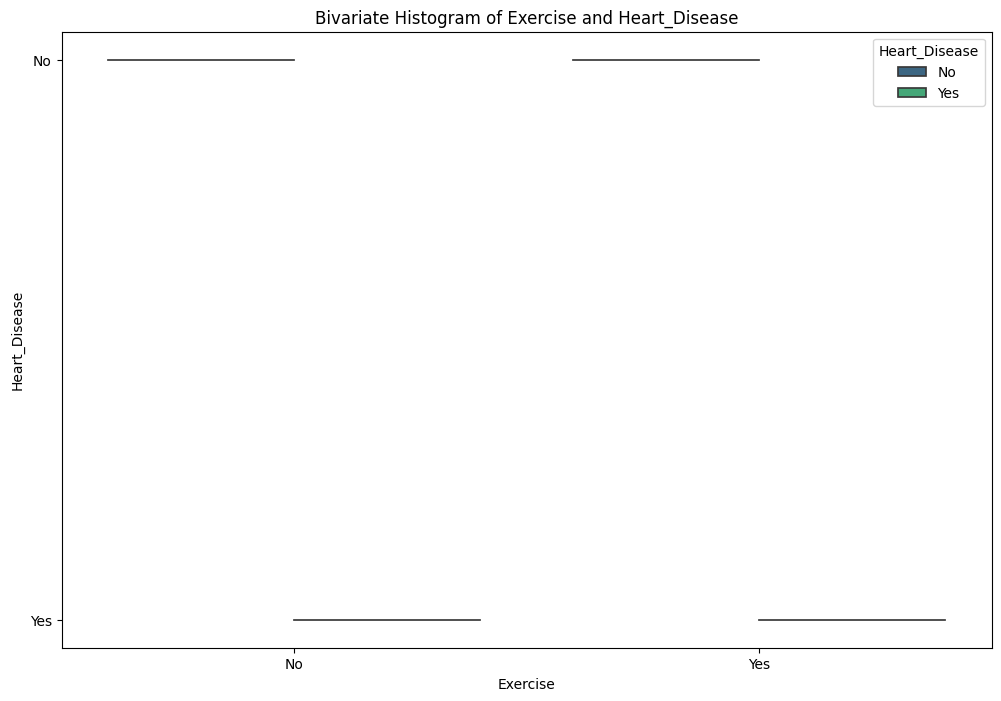

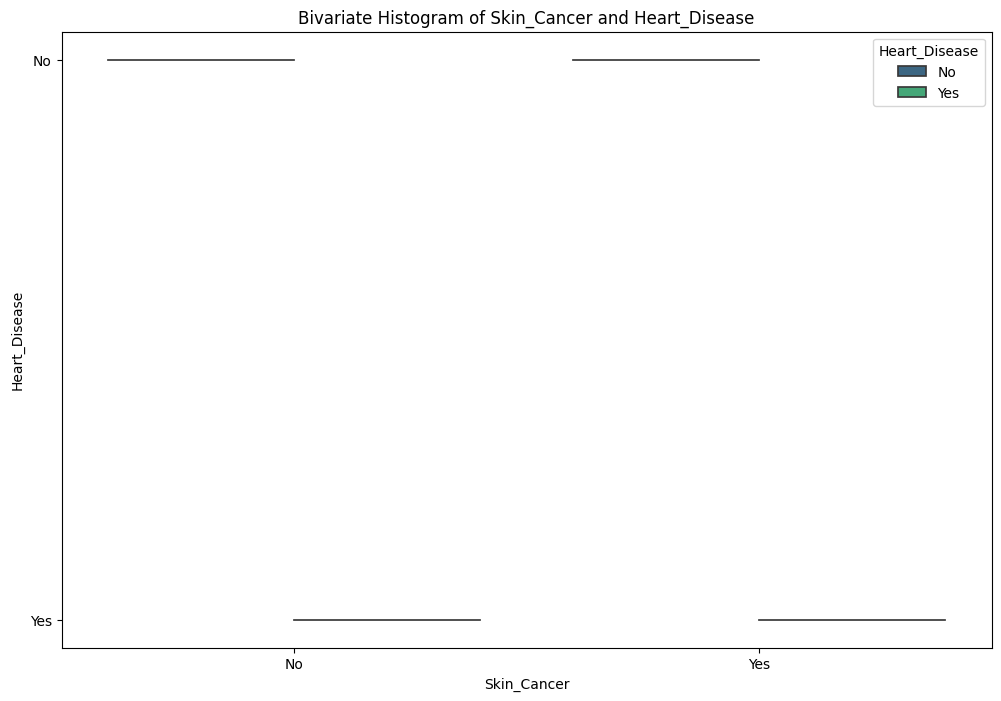

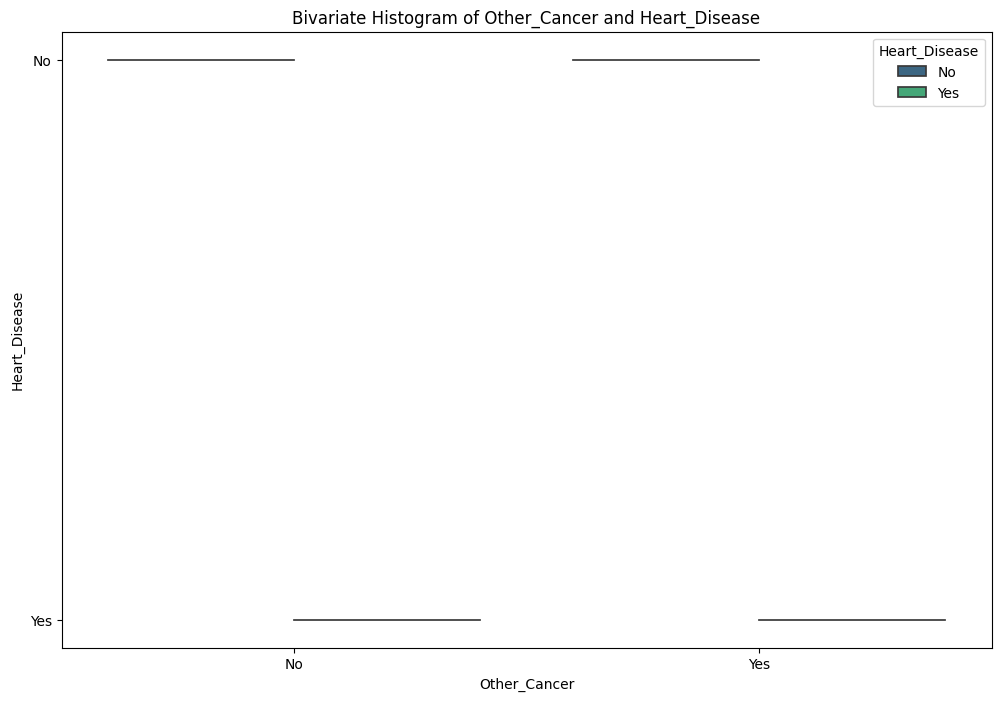

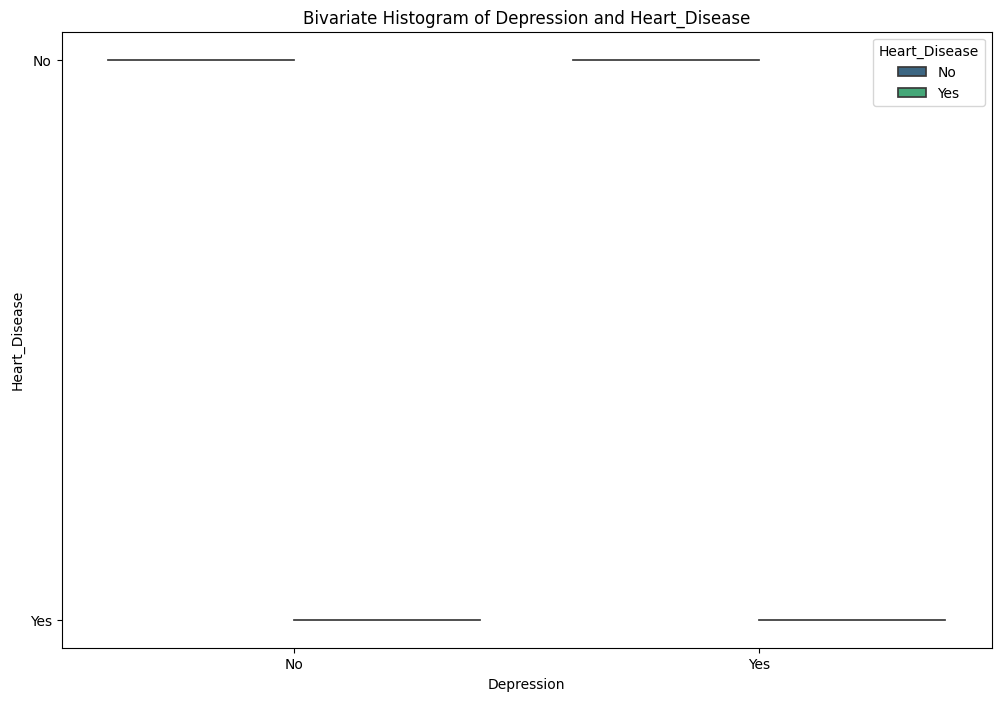

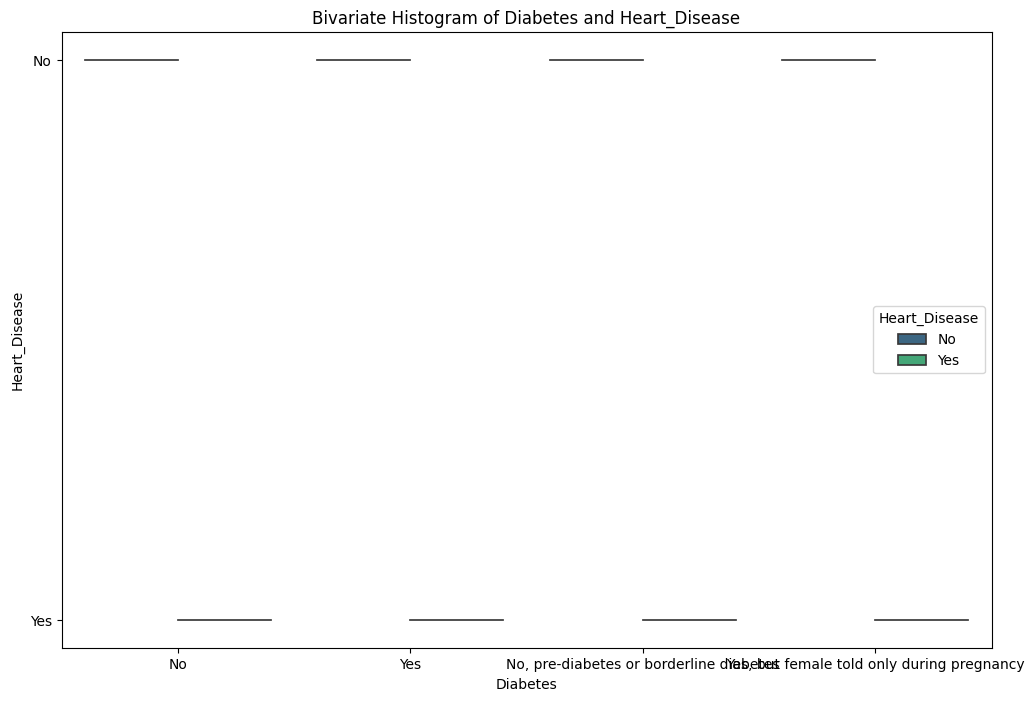

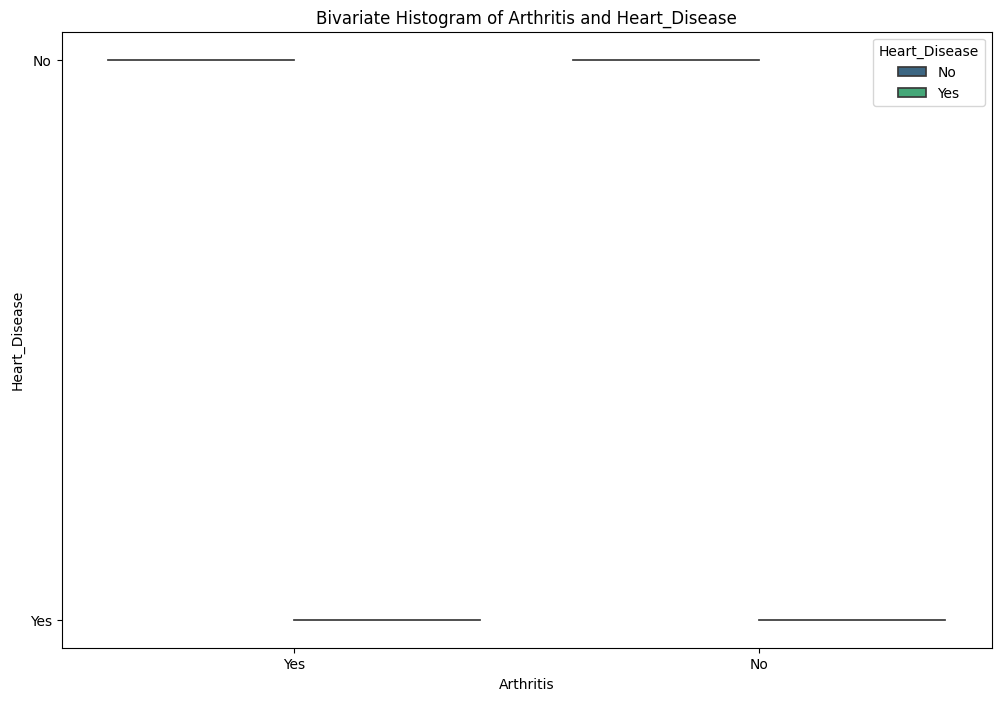

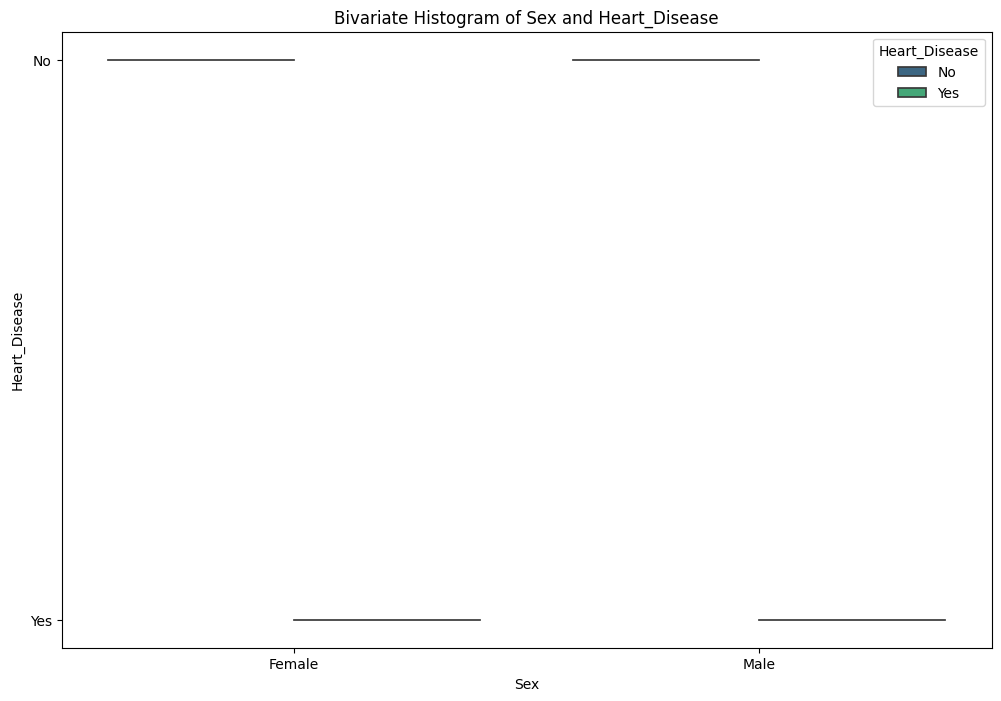

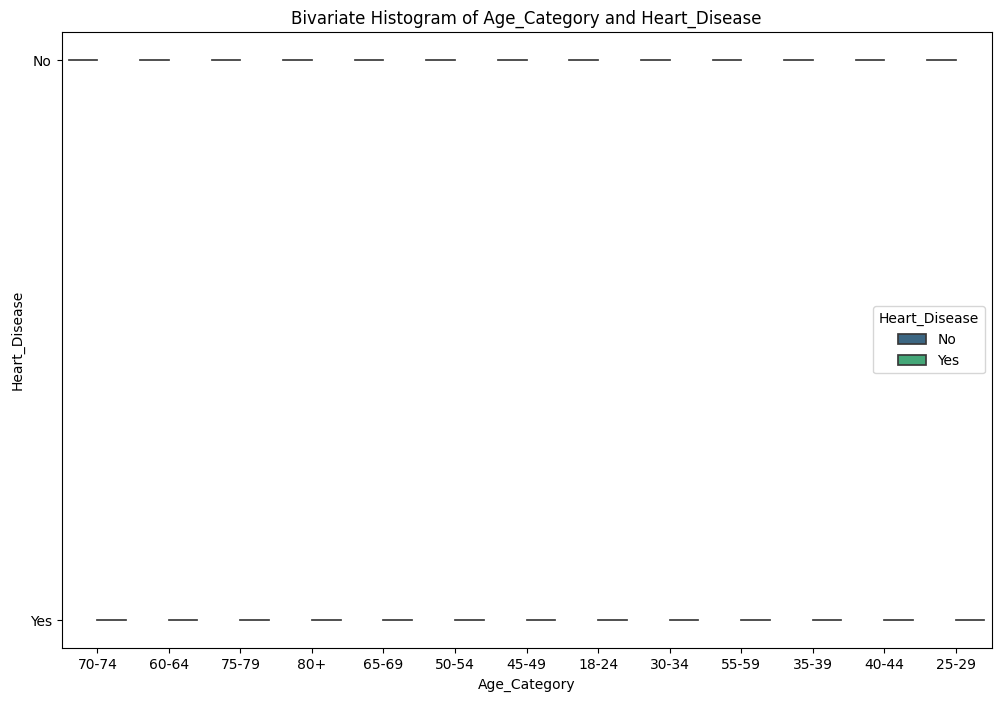

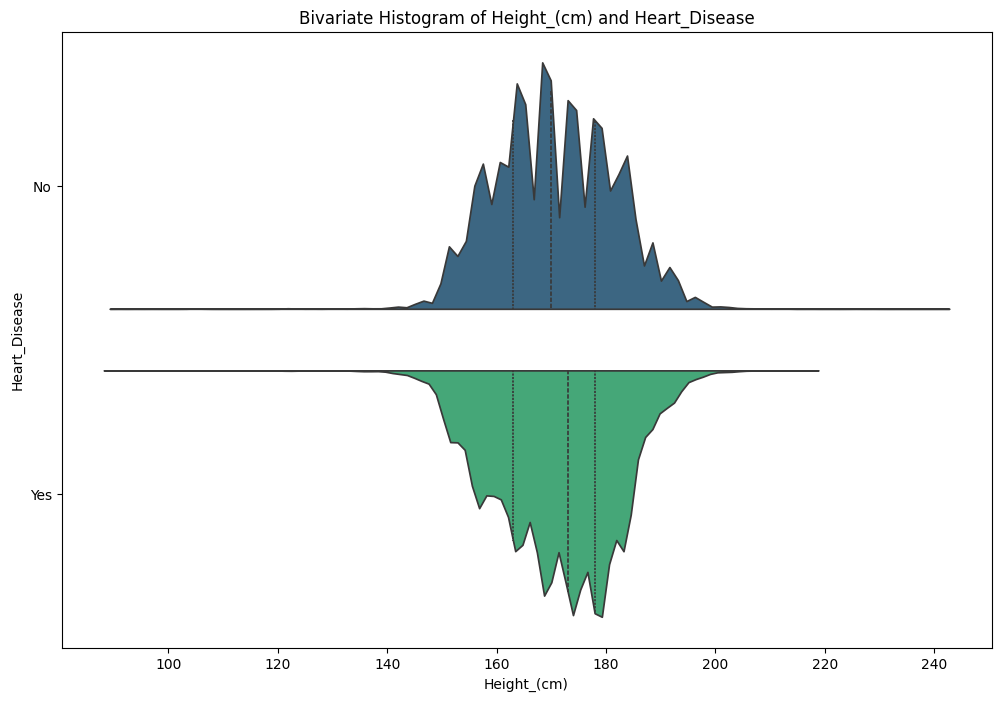

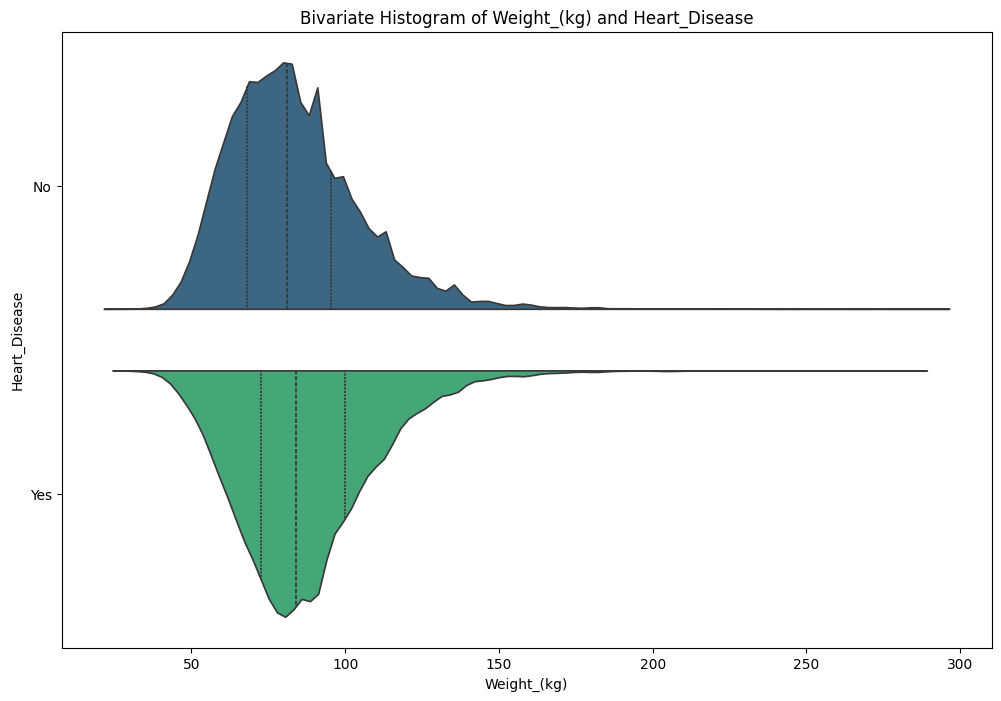

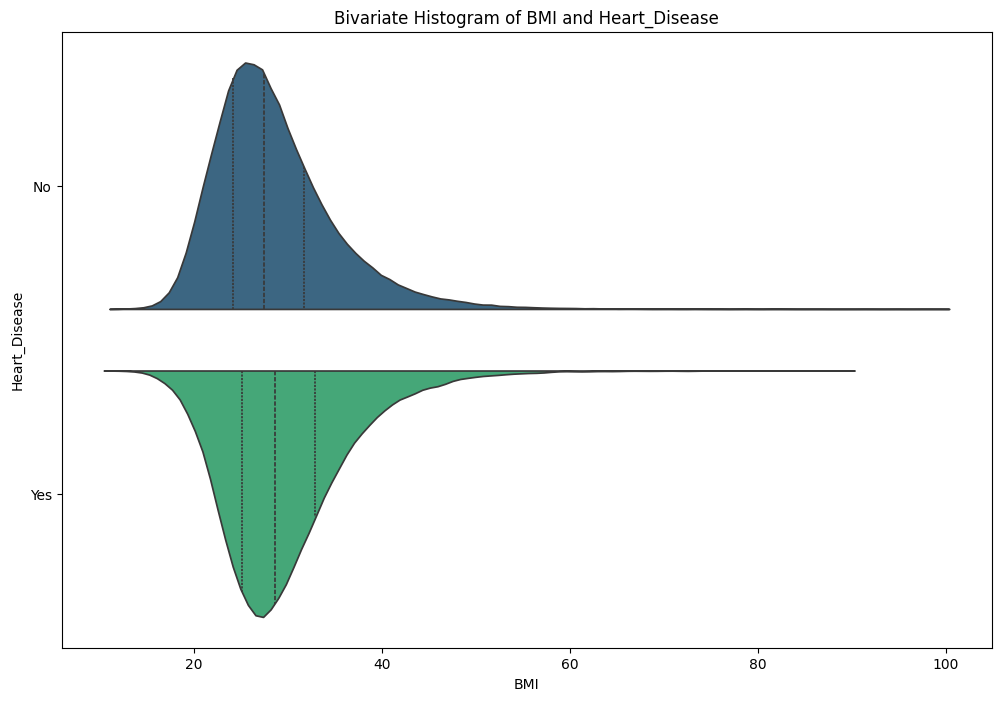

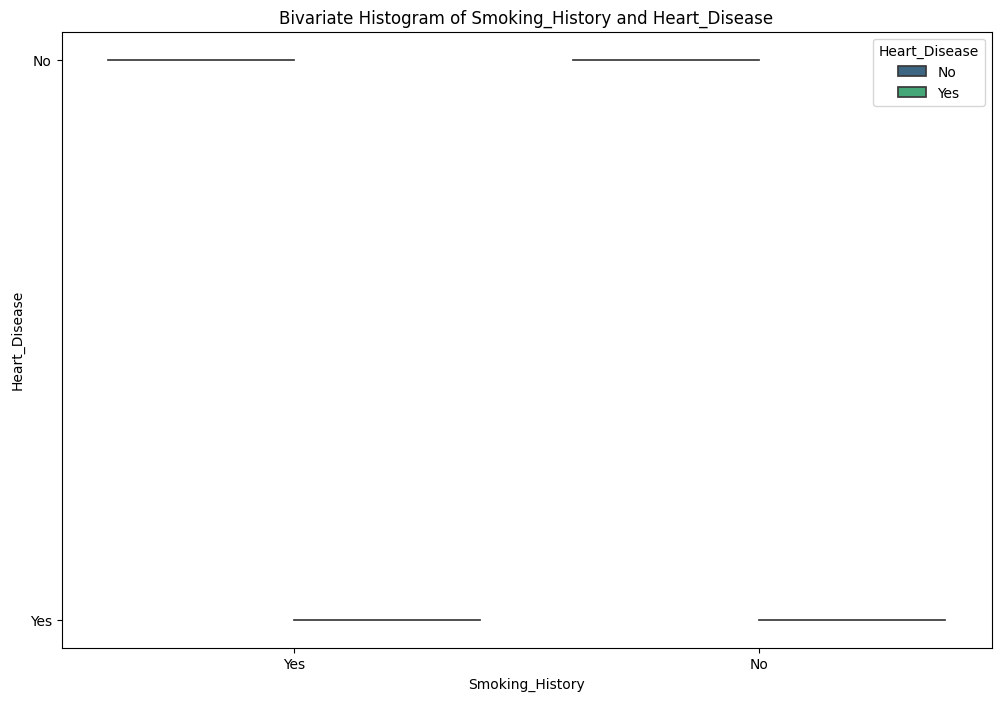

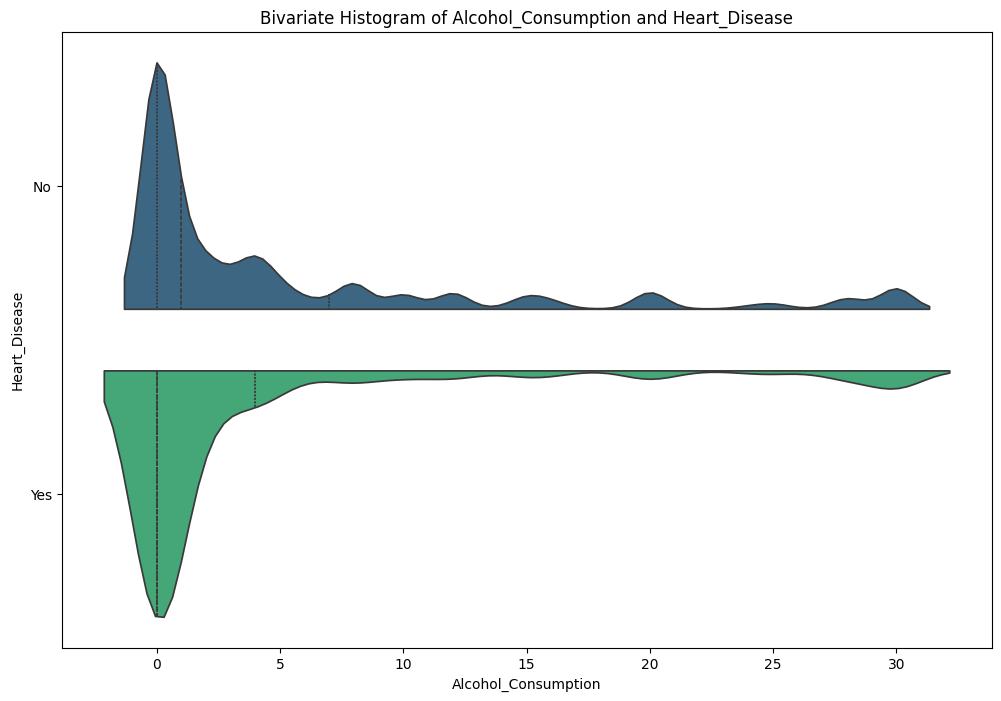

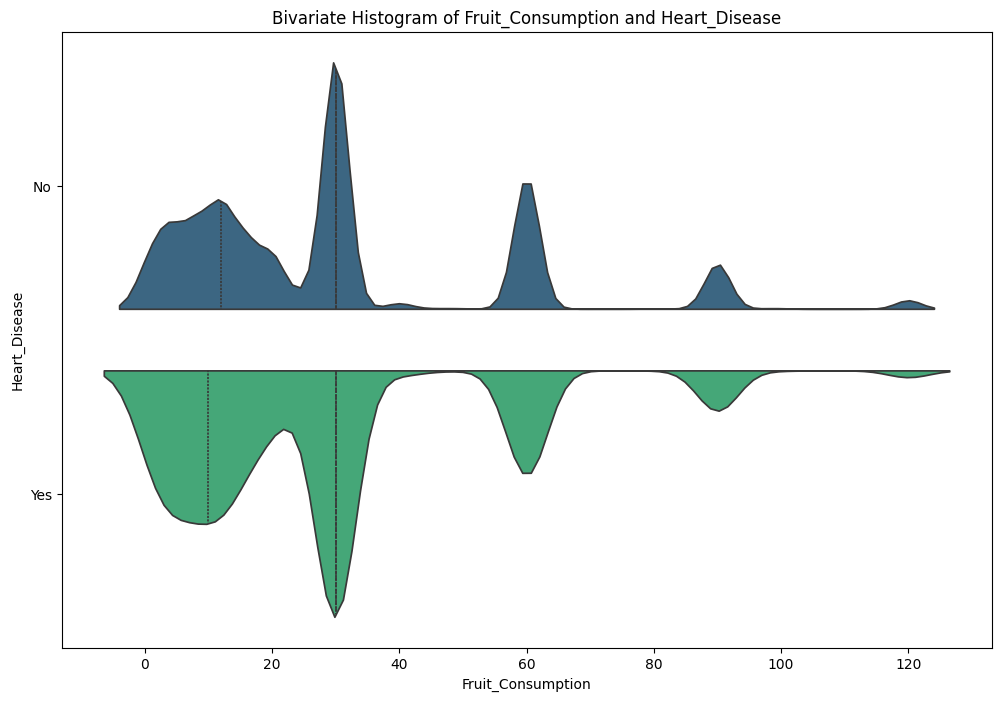

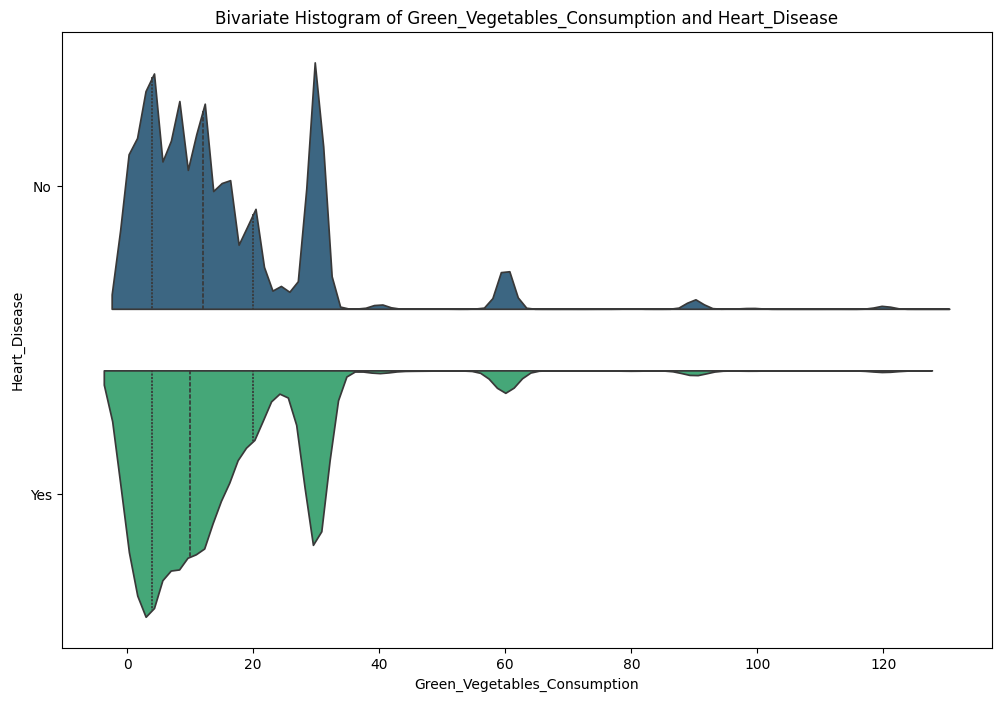

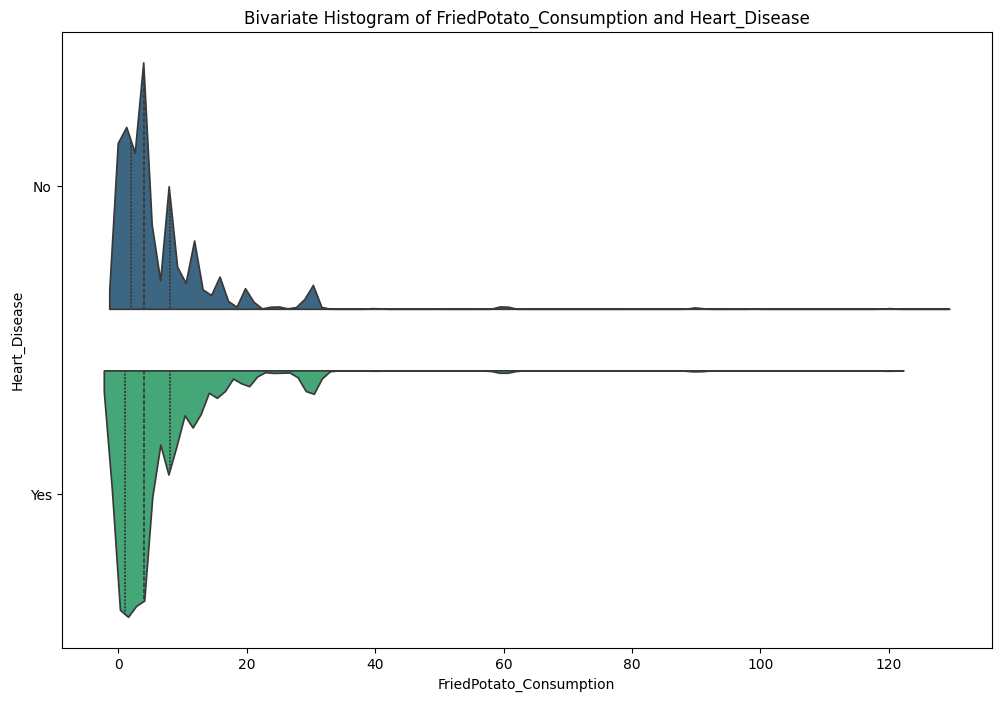

In [13]:
for feature in data.columns:
    if feature != target:
        bivariate(feature)

### Encoding the object the features for training the dataset

In [14]:
encoder = LabelEncoder()

def encoding(col):
    data[col] = encoder.fit_transform(data[col])
    return encoder.classes_

In [15]:
for col in data.select_dtypes('object').columns:
    print(f'{col}\n{encoding(col)}\n')

General_Health
['Excellent' 'Fair' 'Good' 'Poor' 'Very Good']

Checkup
['5 or more years ago' 'Never' 'Within the past 2 years'
 'Within the past 5 years' 'Within the past year']

Exercise
['No' 'Yes']

Heart_Disease
['No' 'Yes']

Skin_Cancer
['No' 'Yes']

Other_Cancer
['No' 'Yes']

Depression
['No' 'Yes']

Diabetes
['No' 'No, pre-diabetes or borderline diabetes' 'Yes'
 'Yes, but female told only during pregnancy']

Arthritis
['No' 'Yes']

Sex
['Female' 'Male']

Age_Category
['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80+']

Smoking_History
['No' 'Yes']



#### Convert some features from 'int' to 'uint8' as that will take little space in model training

In [16]:
data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [17]:
binaryFeatures = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Smoking_History']
for col in binaryFeatures:
    data[col] = data[col].astype('uint8')

In [18]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int32  
 1   Checkup                       308854 non-null  int32  
 2   Exercise                      308854 non-null  uint8  
 3   Heart_Disease                 308854 non-null  uint8  
 4   Skin_Cancer                   308854 non-null  uint8  
 5   Other_Cancer                  308854 non-null  uint8  
 6   Depression                    308854 non-null  uint8  
 7   Diabetes                      308854 non-null  int32  
 8   Arthritis                     308854 non-null  uint8  
 9   Sex                           308854 non-null  uint8  
 10  Age_Category                  308854 non-null  int32  
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

### Remove the unnecessary features from the dataset.

In [20]:
data.drop(columns=['BMI'], axis=1, inplace=True)

### Description of the dataset

In [21]:
data.describe()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,2.273278,3.515069,0.775062,0.080850,0.097114,0.096738,0.200422,0.308159,0.327245,0.481321,6.535888,170.615249,83.588655,0.405577,5.096366,29.835200,15.110441,6.296616
std,1.494109,1.019576,0.417542,0.272606,0.296113,0.295602,0.400316,0.724383,0.469208,0.499652,3.523526,10.658026,21.343210,0.491004,8.199763,24.875735,14.926238,8.582954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,24.950000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,163.000000,68.040000,0.000000,0.000000,12.000000,4.000000,2.000000
50%,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,170.000000,81.650000,0.000000,1.000000,30.000000,12.000000,4.000000
75%,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,178.000000,95.250000,1.000000,6.000000,30.000000,20.000000,8.000000
max,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,12.000000,241.000000,293.020000,1.000000,30.000000,120.000000,128.000000,128.000000


### Correlation of other features with target feature

In [22]:
correlation = data.corr()
correlation[target].sort_values(ascending=False)

Heart_Disease                   1.000000
Age_Category                    0.229011
Diabetes                        0.166241
Arthritis                       0.153913
Smoking_History                 0.107797
Other_Cancer                    0.092387
Skin_Cancer                     0.090848
Checkup                         0.083480
Sex                             0.072595
Weight_(kg)                     0.045875
Depression                      0.032526
Height_(cm)                     0.015780
FriedPotato_Consumption        -0.009227
Fruit_Consumption              -0.020055
General_Health                 -0.020645
Green_Vegetables_Consumption   -0.024043
Alcohol_Consumption            -0.036569
Exercise                       -0.096347
Name: Heart_Disease, dtype: float64

### Visulize the correlation on graph

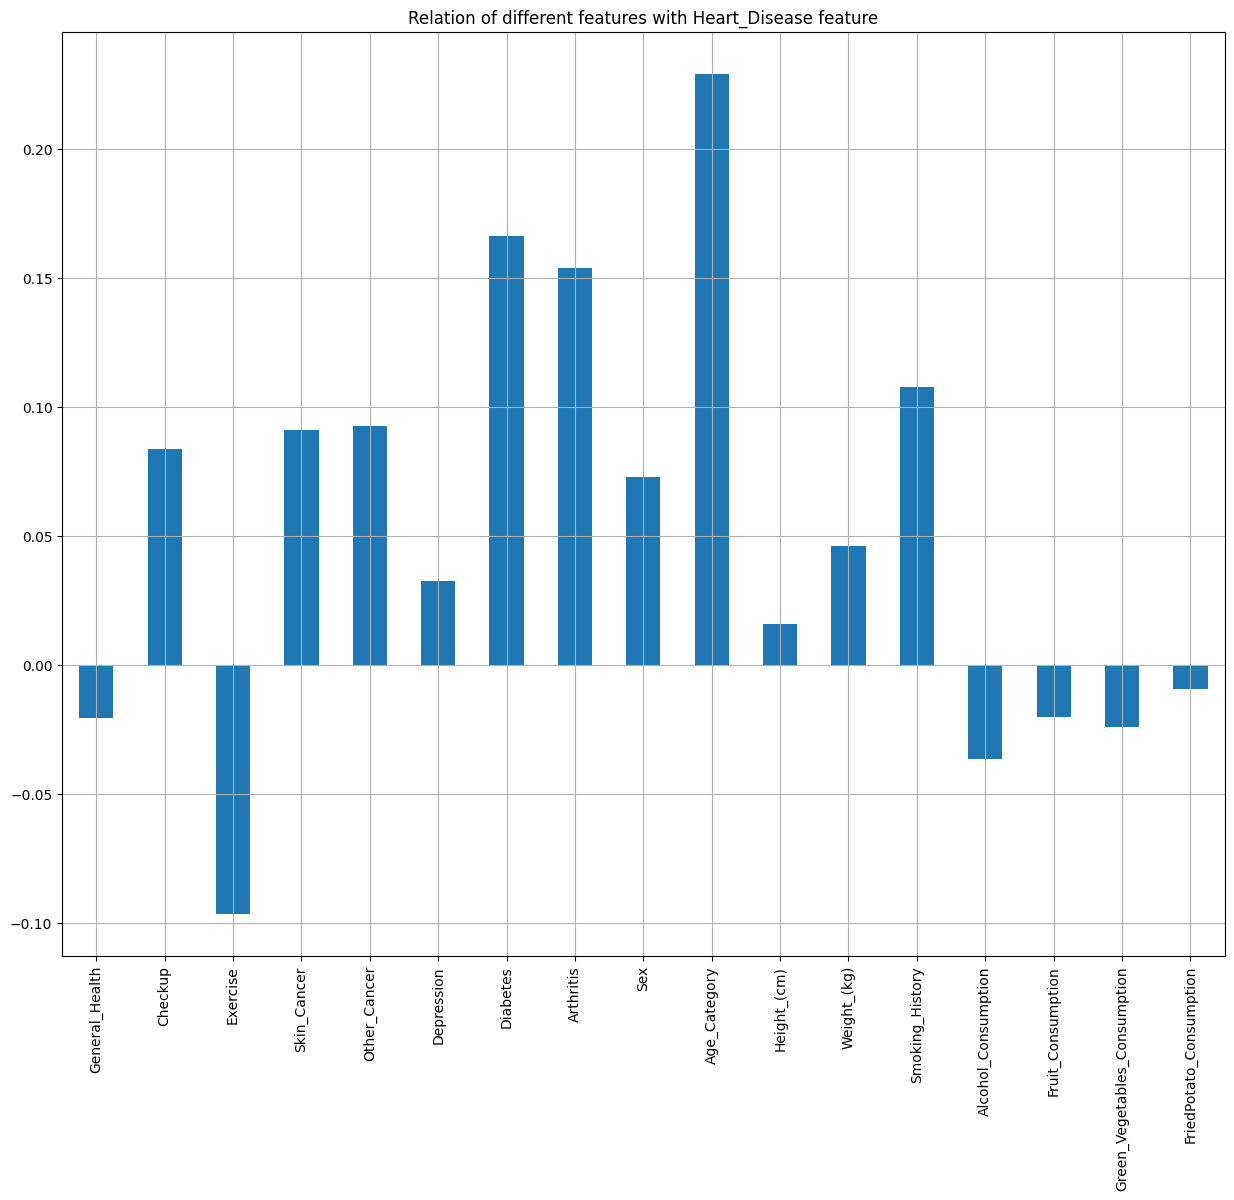

In [23]:
data2 = data.drop(columns=[target], axis=1)
data2.corrwith(data[target]).plot.bar(figsize=(15, 12), title=f'Relation of different features with {target} feature', rot=90, grid=True)
plt.savefig('target_correlation.png')
plt.show()

### Plotting the heatmap for features relation with target variable

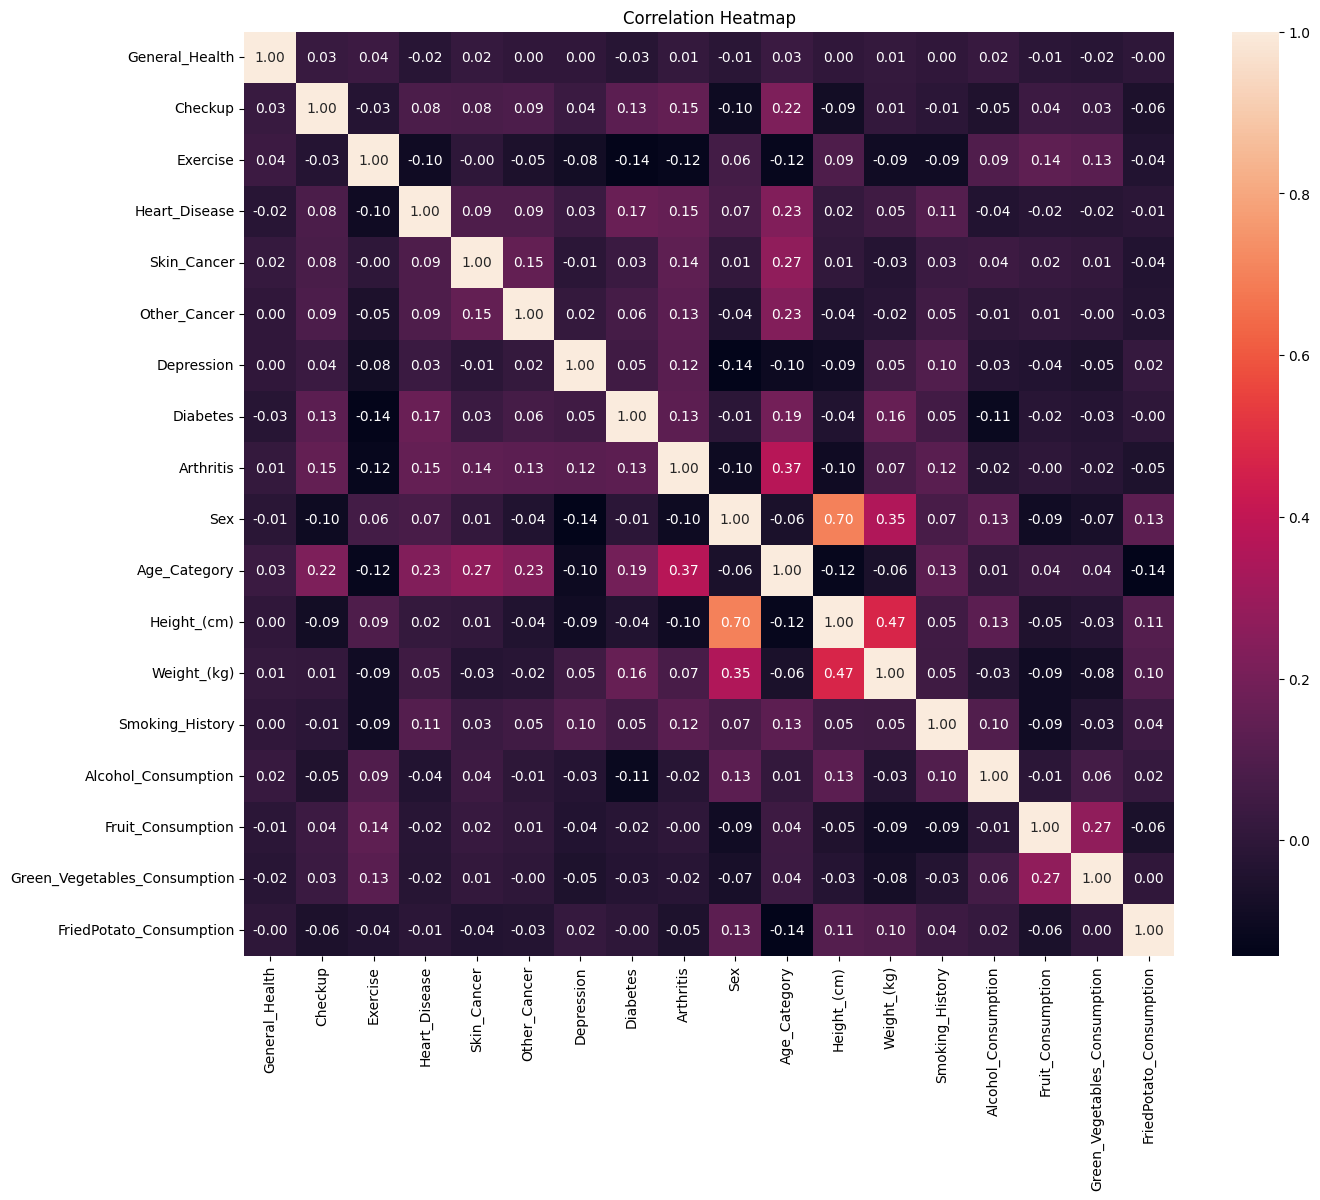

In [24]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, fmt='.2f', annot=True)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

## Start model building and training the model

In [25]:
x = data.drop(columns=[target], axis=1)
y = data[target]

print(x.shape)
print(y.shape)

(308854, 17)
(308854,)


### Splitting the dataset into training and testing set

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print('Training set:', xtrain.shape, ytrain.shape)
print('Testing set:', xtest.shape, ytest.shape)

Training set: (247083, 17) (247083,)
Testing set: (61771, 17) (61771,)


#### Building a Deep Neural Network for model building

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

D:\Coding\Projects\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9162 - loss: 0.3053 - val_accuracy: 0.9185 - val_loss: 0.2756
Epoch 2/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9190 - loss: 0.2477 - val_accuracy: 0.9185 - val_loss: 0.2957
Epoch 3/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9190 - loss: 0.2414 - val_accuracy: 0.9185 - val_loss: 0.2503
Epoch 4/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9199 - loss: 0.2353 - val_accuracy: 0.9185 - val_loss: 0.2580
Epoch 5/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 6s 992us/step - accuracy: 0.9188 - loss: 0.2369 - val_accuracy: 0.9185 - val_loss: 0.2609
Epoch 6/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9189 - loss: 0.2364 - val_accuracy: 0.9185 - val_loss: 0.2447
Epoch 7/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9201 - loss: 0.2329 - val_accuracy: 0.9185 - val_loss: 0.2485
Epoch 8/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9196 - loss: 0.2359

In [29]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f'Test Accuracy: {round(test_acc*100, 2)}%')
print(f'Test Loss: {round(test_loss*100, 2)}%')

1931/1931 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9212 - loss: 0.2383
Test Accuracy: 91.92%
Test Loss: 24.17%


#### Prediction of model

In [30]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,1,0.0,8.0,4.0,0.0


In [31]:
'''
[General_Health, Checkup, Exercise, Skin_Cancer, Other_Cancer, Depression, Diabetes, 
Arthritis, Sex, Age_Category, Height_(cm), Weight_(kg), Smoking_History, Alcohol_Consumption, 
Fruit_Consumption, Green_Vegetables_Consumption, FriedPotato_Consumption]
'''

feature = np.array([[3,2,0,0,0,0,0,1,0,10,150.0,32.66,1,0.0,30.0,16.0,12.0]])
print(model.predict(feature))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
[[0.17866041]]


##### By considering 0.5 as a threshold value, we will predict the result.

#### Graphical visualization of model testing

1931/1931 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step


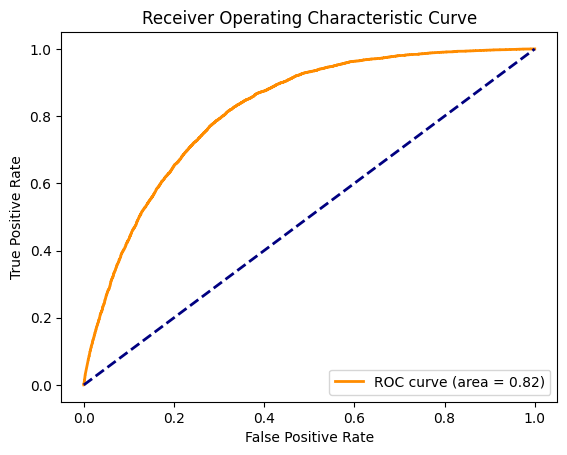

In [32]:
from sklearn.metrics import roc_curve, auc
ypred = model.predict(xtest)

fpr, tpr, thresholds = roc_curve(ytest, ypred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.savefig('characteristic_curve.png')
plt.show()

In [33]:
ypred_val = (ypred > 0.5).ravel()
error = (ypred_val - ytest)**2
print(ytest.shape, error.sum())

(61771,) 4994


#### Converting model into `joblib` extension file to create a website.

In [34]:
import joblib
joblib.dump(model, 'cvd_model.joblib')

['cvd_model.joblib']

### DNN model gives 91.91% accuracy after tuning of hyper-parameters.